# ANALYSE DES VENTES POUR NOVATREND UNE STARTUP FICTIVE SPÉCIALISÉE DANS LE DOMAINE DU E-COMMERCE

### Voici les différentes étapes de notre analyse.

### 1- Charger le fichier sales_data.csv dans un DataFrame Pandas

### 2- Vérifier les valeurs manquantes et les traiter (suppression ou imputation)

### 3- Calculer :

#### - Le chiffre d’affaires total

#### - Le top 5 des produits les plus vendus

#### - Les revenus par catégorie de produit

#### - Les statistiques descriptives sur les quantités vendues

#### - Réaliser au moins deux graphiques :

#### - Histogramme des quantités vendues par produit

#### - Camembert des revenus par catégorie

### 4- Résumer les résultats dans un fichier texte sales_report.txt

### 1- Charger le fichier sales_data.csv dans un DataFrame Pandas

In [1]:
# Importation des librairies qui seront utilisés
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator

In [2]:
# On ouvrira ici le fichier sales au format excel.
sales = pd.read_csv("/Users/Lenovo/Downloads/sales_data.csv")
sales_df = pd.DataFrame(sales)
sales_df.index = sales_df.order_id
sales_df

,order_id,product,category,price,quantity,order_date,customer_id,payment_method,country
order_id,,,,,,,,,
ORD1000,ORD1000,Wireless Headphones,Audio,1167.65,5,2023-03-12,CUST371,PayPal,Canada
ORD1001,ORD1001,Smartphone X,Electronics,287.54,3,2023-01-31,CUST769,Bank Transfer,France
ORD1002,ORD1002,Bluetooth Speaker,Audio,450.09,5,2023-04-23,CUST962,Credit Card,UK
ORD1003,ORD1003,Gaming Mouse,Accessories,1254.75,2,2023-08-29,CUST724,PayPal,France
ORD1004,ORD1004,Laptop Pro,Computers,76.20,2,2023-04-25,CUST609,PayPal,Spain
...,...,...,...,...,...,...,...,...,...
ORD1195,ORD1195,Wireless Headphones,Audio,1254.68,5,2023-02-08,CUST372,Cryptocurrency,USA
ORD1196,ORD1196,Smartphone X,Electronics,178.49,1,2023-11-03,CUST135,Credit Card,Spain
ORD1197,ORD1197,Wireless Headphones,Audio,1004.51,5,2023-09-06,CUST288,Bank Transfer,UK


In [3]:
# on procèdera maintenant à la suppression de la colonne "order_id",
# elle sera utilisée comme index de notre DataFrame
del sales_df["order_id"]
sales_df

,product,category,price,quantity,order_date,customer_id,payment_method,country
order_id,,,,,,,,
ORD1000,Wireless Headphones,Audio,1167.65,5,2023-03-12,CUST371,PayPal,Canada
ORD1001,Smartphone X,Electronics,287.54,3,2023-01-31,CUST769,Bank Transfer,France
ORD1002,Bluetooth Speaker,Audio,450.09,5,2023-04-23,CUST962,Credit Card,UK
ORD1003,Gaming Mouse,Accessories,1254.75,2,2023-08-29,CUST724,PayPal,France
ORD1004,Laptop Pro,Computers,76.20,2,2023-04-25,CUST609,PayPal,Spain
...,...,...,...,...,...,...,...,...
ORD1195,Wireless Headphones,Audio,1254.68,5,2023-02-08,CUST372,Cryptocurrency,USA
ORD1196,Smartphone X,Electronics,178.49,1,2023-11-03,CUST135,Credit Card,Spain
ORD1197,Wireless Headphones,Audio,1004.51,5,2023-09-06,CUST288,Bank Transfer,UK


In [4]:
# nous nous retrouvons maintenant avec 8 colonnes pour 200 lignes
# résumé général de notre tableau
sales_df.describe

<bound method NDFrame.describe of                       product     category    price  quantity  order_date  \
order_id                                                                    
ORD1000   Wireless Headphones        Audio  1167.65         5  2023-03-12   
ORD1001          Smartphone X  Electronics   287.54         3  2023-01-31   
ORD1002     Bluetooth Speaker        Audio   450.09         5  2023-04-23   
ORD1003          Gaming Mouse  Accessories  1254.75         2  2023-08-29   
ORD1004            Laptop Pro    Computers    76.20         2  2023-04-25   
...                       ...          ...      ...       ...         ...   
ORD1195   Wireless Headphones        Audio  1254.68         5  2023-02-08   
ORD1196          Smartphone X  Electronics   178.49         1  2023-11-03   
ORD1197   Wireless Headphones        Audio  1004.51         5  2023-09-06   
ORD1198            Smartwatch    Wearables   513.37         2  2023-09-20   
ORD1199          Gaming Mouse  Accessories

In [5]:
def counting(go : list) : 
    dictio = {elements : go.count(elements) for elements in go}
    return dictio
country_count = counting(list(sales_df.country))
country_count

{'Canada': 29, 'France': 32, 'UK': 37, 'Spain': 34, 'USA': 34, 'Germany': 34}

#### on réalise que l'Ukraine est le pays avec le plus de client

In [6]:
payment_count = counting(list(sales_df.payment_method))
payment_count

{'PayPal': 49, 'Bank Transfer': 48, 'Credit Card': 46, 'Cryptocurrency': 57}

#### on note que les cryptomonnaies sont les plus utiilisées

In [7]:
category_count = counting(list(sales_df.category))
category_count

{'Audio': 71,
 'Electronics': 31,
 'Accessories': 37,
 'Computers': 28,
 'Wearables': 33}

#### Les clients achètent plus d'appareils audio qu'autre chose

### 2- Vérifier les valeurs manquantes et les traiter (suppression ou imputation)

In [8]:
sales_df.isnull().sum()

product           0
category          0
price             0
quantity          0
order_date        0
customer_id       0
payment_method    0
country           0
dtype: int64

#### Il n'y a aucune valeur nulle ou manquante. Il n'est donc pas néccéssaire de procéder à un nettoyage

### 3- Calculer :

### - Le chiffre d’affaires total
Nous allons procéder au calcul du chiffre d'affaire total

In [15]:
# nous mettons les collonnes concernées dans deux différentes listes pour une meilleure manipulation
#Chiffre d'affaire = produit scalaire (prix, quantité) ou 'sumproduct en language excel

prix = np.array(list(sales_df.price))
quantités = np.array(list(sales_df.quantity))
CA = round(np.dot(prix, quantités), 1)
print(f"Le Chiffre d'affaire est : $ {CA} ")

Le Chiffre d'affaire est : $ 517643.9 


- Le top 5 des produits les plus vendus

  Pour cela nous utiliserons le dictionnaire généré plus haut "category_count"

In [10]:
category_count

{'Audio': 71,
 'Electronics': 31,
 'Accessories': 37,
 'Computers': 28,
 'Wearables': 33}

In [11]:
# nous allons l'ordonner en fonction de l'occurrence, la valeur
category_sorted = dict(sorted(category_count.items(), key = operator.itemgetter(1), reverse = True))
category_sorted

{'Audio': 71,
 'Accessories': 37,
 'Wearables': 33,
 'Electronics': 31,
 'Computers': 28}

In [13]:
# classification finale, meilleure affichage

count = 1
for key, value in category_sorted.items() : 
    if count == len(category_sorted) + 1 :
        break
    else : 
        print(f" The Number {count} product is : {key} with {value} pieces")
        count += 1

 The Number 1 product is : Audio with 71 pieces
 The Number 2 product is : Accessories with 37 pieces
 The Number 3 product is : Wearables with 33 pieces
 The Number 4 product is : Electronics with 31 pieces
 The Number 5 product is : Computers with 28 pieces


- les revenus par categorie de produit

In [14]:
sales_df['Revenue'] = sales_df['price'] * sales_df['quantity']
sales_df

,product,category,price,quantity,order_date,customer_id,payment_method,country,Revenue
order_id,,,,,,,,,
ORD1000,Wireless Headphones,Audio,1167.65,5,2023-03-12,CUST371,PayPal,Canada,5838.25
ORD1001,Smartphone X,Electronics,287.54,3,2023-01-31,CUST769,Bank Transfer,France,862.62
ORD1002,Bluetooth Speaker,Audio,450.09,5,2023-04-23,CUST962,Credit Card,UK,2250.45
ORD1003,Gaming Mouse,Accessories,1254.75,2,2023-08-29,CUST724,PayPal,France,2509.50
ORD1004,Laptop Pro,Computers,76.20,2,2023-04-25,CUST609,PayPal,Spain,152.40
...,...,...,...,...,...,...,...,...,...
ORD1195,Wireless Headphones,Audio,1254.68,5,2023-02-08,CUST372,Cryptocurrency,USA,6273.40
ORD1196,Smartphone X,Electronics,178.49,1,2023-11-03,CUST135,Credit Card,Spain,178.49
ORD1197,Wireless Headphones,Audio,1004.51,5,2023-09-06,CUST288,Bank Transfer,UK,5022.55


In [18]:
# De cette façon nous pouvons confirmer le chiffre d'affaire total calculé plus haut
CA_conf = round(sum(list(sales_df.Revenue)), 1)
if CA == CA_conf : 
    print("confirmé")
else : 
    print("Vérifiez vos calculs")

confirmé


Nous confirmons donc que le chiffre d'affaire est correct. Nous continuons donc.

In [35]:
# calcul du Revenu par categorie
Rev_cat = sales_df.groupby("category")["Revenue"].sum()
Rev_cat

category
Accessories    107001.86
Audio          174143.34
Computers       74599.84
Electronics     87890.41
Wearables       74008.44
Name: Revenue, dtype: float64

In [36]:
revenue_cat_dict = dict(Rev_cat)
new_rev_dict = {}
for key, value in revenue_cat_dict.items() : 
    new_rev_dict[key] = round(value, 1)
new_rev_dict

{'Accessories': 107001.9,
 'Audio': 174143.3,
 'Computers': 74599.8,
 'Electronics': 87890.4,
 'Wearables': 74008.4}

In [26]:
# La classification se fera maintenant en ordre décroissant
new_rev_dict_sorted = dict(sorted(new_rev_dict.items(), key = operator.itemgetter(1), reverse = True))
count = 1
for key, value in new_rev_dict_sorted.items() : 
    if count == len(new_rev_dict_sorted) + 1 :
        break
    else : 
        print(f" The Number {count} product is : {key} with a revenue of {value} dollars")
        count += 1

 The Number 1 product is : Audio with a revenue of 174143.3 dollars
 The Number 2 product is : Accessories with a revenue of 107001.9 dollars
 The Number 3 product is : Electronics with a revenue of 87890.4 dollars
 The Number 4 product is : Computers with a revenue of 74599.8 dollars
 The Number 5 product is : Wearables with a revenue of 74008.4 dollars


#### - Les statistiques descriptives sur les quantités vendues

In [27]:
sales_df.describe()

,price,quantity,Revenue
count,200.0000,200.000000,200.000000
mean,814.5600,3.160000,2588.219450
std,427.3182,1.390709,1877.270913
min,52.9600,1.000000,63.610000
25%,447.9625,2.000000,1077.615000
50%,871.4900,3.000000,2199.560000
75%,1187.4775,4.000000,3701.515000
max,1495.6700,5.000000,7051.300000


#### - Histogramme des quantités vendues par produit

#### - Camembert des revenus par catégorie

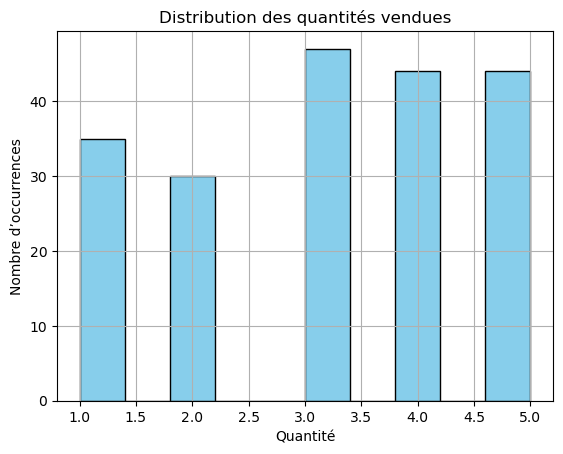

In [31]:
# Histogramme
import matplotlib.pyplot as plt
plt.hist(sales_df["quantity"], bins = 10, color = "skyblue", edgecolor = "black")
plt.title("Distribution des quantités vendues")
plt.xlabel("Quantité")
plt.ylabel("Nombre d’occurrences")
plt.grid(True)
plt.show()

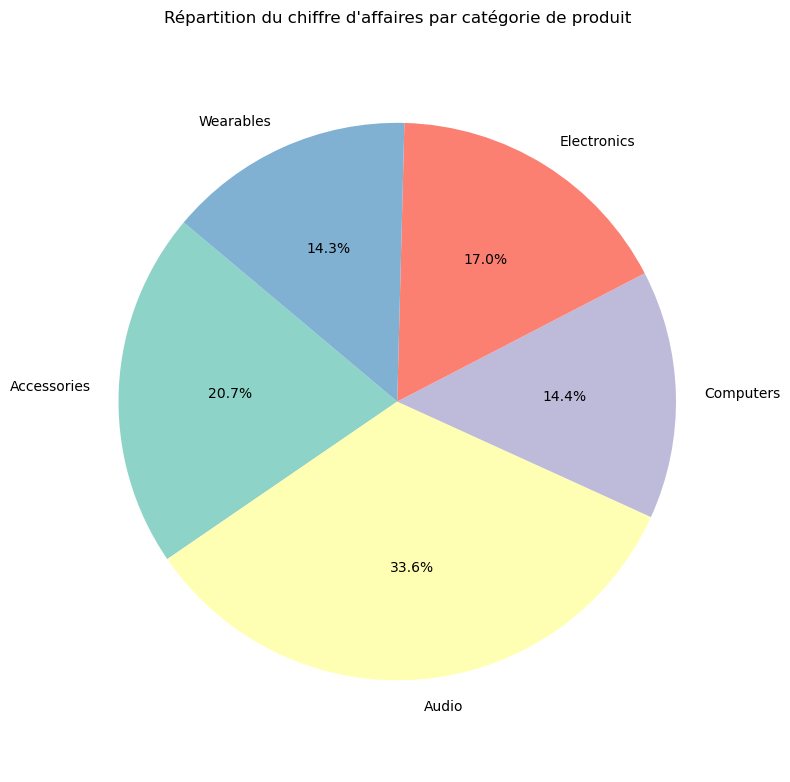

In [39]:
#Camembert
# Données
Rev_cat_df = sales_df.groupby("category")["Revenue"].sum().reset_index()
labels = Rev_cat_df["category"]
revenus = Rev_cat_df["Revenue"]

# Tracer le camembert
plt.figure(figsize = (8, 8))
plt.pie(
    revenus, 
    labels = labels, 
    autopct = '%1.1f%%', 
    startangle = 140, 
    shadow = False,
    colors = plt.cm.Set3.colors  # Palette douce (optionnelle)
)
plt.title("Répartition du chiffre d'affaires par catégorie de produit")
plt.axis('equal')  # Camembert bien rond
plt.tight_layout()
plt.show()

#### Exportation dans un fichier 

In [41]:
# 1. Calculs préalables
chiffre_affaires_total = sales_df["Revenue"].sum()

top_5_produits = (
    sales_df.groupby("product")["quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

revenus_par_categorie = (
    sales_df.groupby("category")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

stats_quantity = sales_df["quantity"].describe()

In [42]:
with open("sales_report.txt", "w", encoding="utf-8") as f:
    f.write("=== RAPPORT DE VENTE – NOVATREND E-COMMERCE ===\n\n")
    
    f.write("1. Chiffre d’affaires total :\n")
    f.write(f"{chiffre_affaires_total:,.2f} €\n\n")

    f.write("2. Top 5 des produits les plus vendus :\n")
    for produit, quantite in top_5_produits.items():
        f.write(f"- {produit} : {quantite} unités vendues\n")
    f.write("\n")
    
    f.write("3. Revenus par catégorie :\n")
    for categorie, revenu in revenus_par_categorie.items():
        f.write(f"- {categorie} : {revenu:,.2f} €\n")
    f.write("\n")

    f.write("4. Statistiques descriptives sur les quantités vendues :\n")
    for stat, val in stats_quantity.items():
        f.write(f"- {stat} : {val:,.2f}\n")
    f.write("\n")

    f.write("5. Remarques :\n")
    f.write("- Les ventes sont concentrées sur quelques produits phares.\n")
    f.write("- La majorité des commandes se situent entre 1 et 3 unités.\n")
    f.write("- Certaines catégories génèrent un chiffre d’affaires nettement supérieur.\n")
    f.write("\n")
    
    f.write("Graphiques enregistrés :\n")
    f.write("- Histogramme : quantities_distribution.png\n")
    f.write("- Camembert : revenues_piechart.png\n")